# Inference for Dynamical Systems on Brain Networks

The previous example was illustrative of how to use the software package presented here. However, is of little use to us when performing research on brain networks. In this tutorial, we will address how to use this software to perforrm variational inference for dynamical systems on brain networks. In particular, we will look at performing inference on an FKPP model on an 83 node brain networks.

### Constructing Brain Network

The first step, is to load in a valid adjacnecy matrix. In this case, we will load some example data taken from 10 Human Connectome Particpants and processed using FSL. 

In [1]:
from netwin import VBModel, infer
from netwin.models import NetworkFKPP

import matplotlib.pyplot as plt
import numpy as np

In [2]:
A = np.genfromtxt('network.csv', delimiter=",")

In [3]:
m = NetworkFKPP(A)

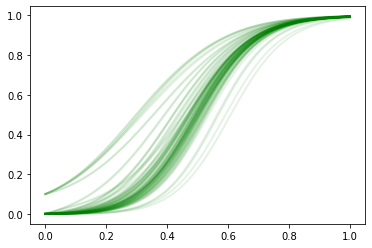

In [4]:
p = np.zeros([83]) + 1e-5
mask = [25, 26, 39, 40, 66, 67, 80, 81]
p[mask] = 0.1

k = 5
a = 10

m.t = np.linspace(0,1,80)

u0 = np.append(np.log(p), np.log([k, a]))

sim = m.forward(u0)

plt.plot(m.t, sim, c='g', alpha=0.1, linewidth=2)
plt.show()

In [5]:
p0 = np.zeros([83])
k0 = 0
a0 = 0
u_guess = np.append(p0, [k0, a0])
n=80

ProbModel = VBModel(model=m, data=sim, init_means=u_guess)

In [6]:
pm = infer(ProbModel, n=60)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Finished!


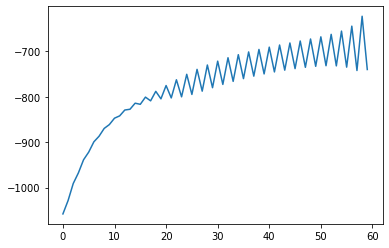

In [7]:
plt.plot(pm.F())

In [8]:
inf = m.forward(pm.m())

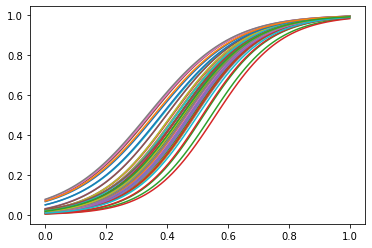

In [9]:
plt.plot(m.t, inf)
plt.show()